In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import os

import pandas as pd


from altaipony.flarelc import FlareLightCurve
from funcs.helper import read_custom_aperture_lc
from funcs.multiperiod import show_flare, find_period, remove_sinusoidal, fetch_lightcurve

In [5]:
CWD = "/".join(os.getcwd().split("/")[:-2])
lcs = pd.read_csv(f"{CWD}/data/summary/lcs.csv")
lcs = lcs.loc[[0,3,4,5],]
lcs

,ID,QCS,typ,cadence_min,mission,prefix,origin,h_mission,SpT,view_start,...,J,R,Gaia_G,vsini_kms,e_vsini_kms,Prot_d,sini,Ref,identifier,Rstar
0,100004076,14,slc,1,kep,KIC,generic,Kepler,L1,1356.50,...,13.078,NaN,17.8356,11.2,2.2,0.37015,>.59,Gizis+13,WISEP J190648.47+401106.8,0.107
3,44984200,10,slc,2,tess,TIC,custom,TESS,M6,1587.25,...,10.309,15.08,14.4115,NaN,NaN,0.11300,NaN,this work,SCR J0838-5855,NaN
4,277539431,12,slc,2,tess,TIC,custom,TESS,M7,1641.00,...,10.630,NaN,14.7381,NaN,NaN,0.19000,NaN,this work,WISEA J105515.71-735611.3,NaN
5,300741820,8,slc,2,tess,TIC,generic,TESS,M6,1522.00,...,11.959,NaN,15.3277,NaN,NaN,0.13200,NaN,Zhan+19,UCAC4 116-015389,NaN


### Just show the flares and save the figures

0% (161/50160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (161/50160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
11% (1987/17755) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
11% (1987/17755) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


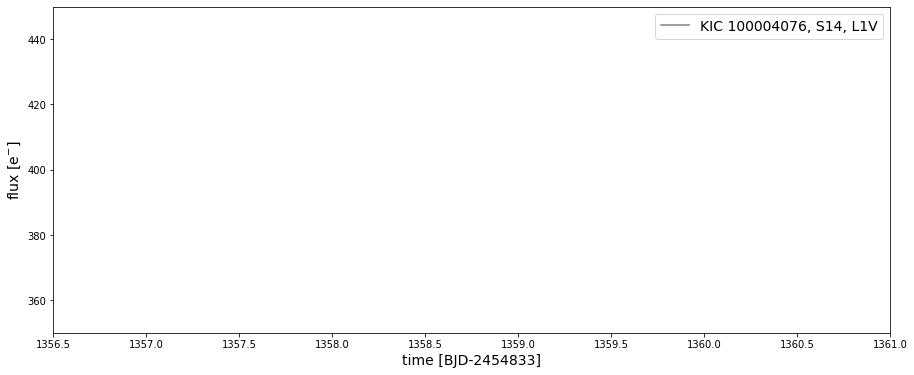

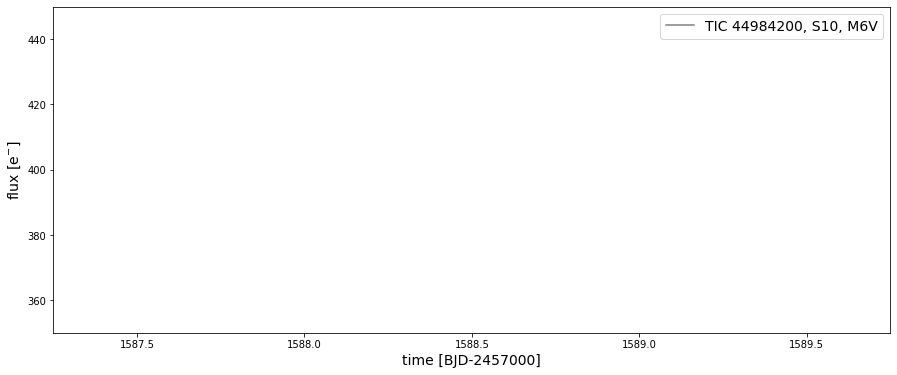

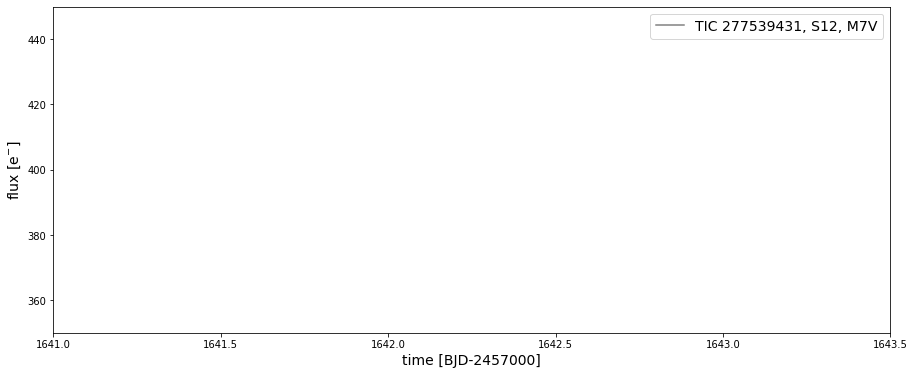

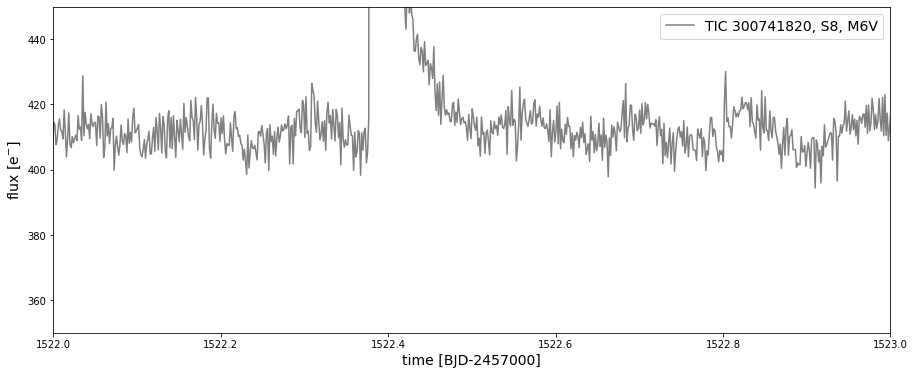

In [10]:
for i, row in lcs.iterrows():
    show_flare(row, save=False)
    plt.ylim(350,450)

### Find the modulation period and plot periodograms

0% (161/50160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (161/50160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


KIC 100004076 modulation period:  8.880603057671022 h
0.37002512740295923 d
TIC 44984200 modulation period:  2.712025530313231 h
0.11300106376305127 d


11% (1987/17755) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
11% (1987/17755) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


TIC 277539431 modulation period:  4.556908315121535 h
0.18987117979673063 d
TIC 300741820 modulation period:  3.167960564278575 h
0.1319983568449406 d


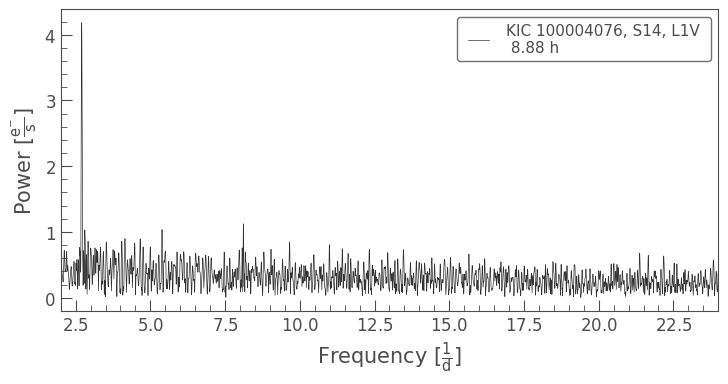

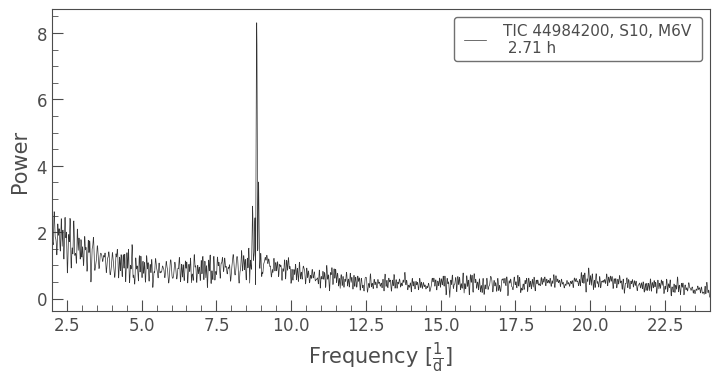

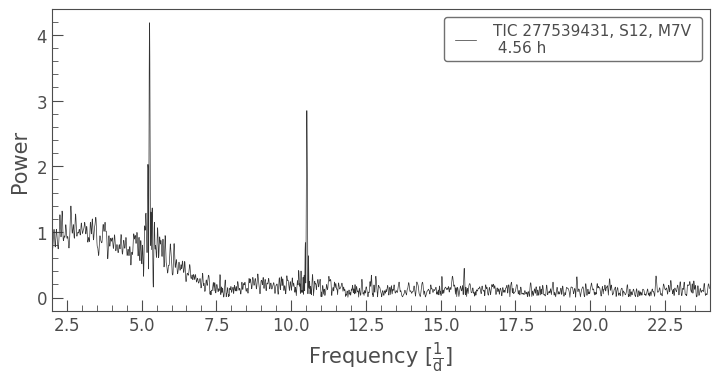

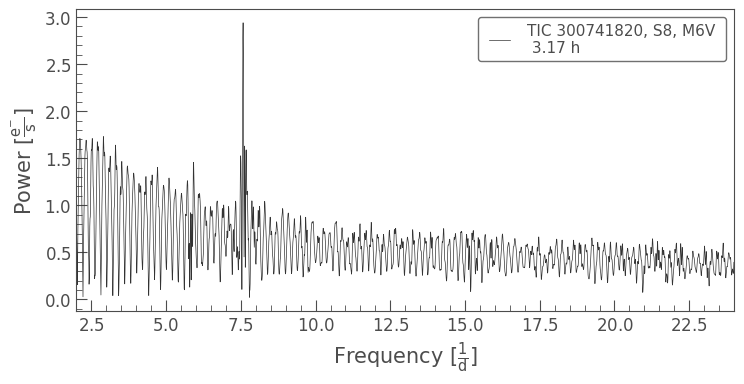

In [6]:
for i, row in lcs.iterrows():
#     print(row.ID)
#     if row.ID == 300741820:
#         #row.origin = "custom"
    period, mfp = find_period(row, save=False, minfreq=2, maxfreq=24, custom=True)
    print(period.to("d"))

In [ ]:
period.to("d")
24*6

In [ ]:

#for i, row in lcs.iterrows():
flc = fetch_lightcurve(lcs.loc[3])
pg = flc.remove_nans().to_periodogram(freq_unit=1/u.d,
                                              maximum_frequency=10,
                                              minimum_frequency=2)

folded = flc.fold(pg.period_at_max_power.to("d").value)
folded.scatter();
plt.ylim(.95,1.05);
t, flux, model, period = remove_sinusoidal(lcs.loc[3], plot=False, save=False)
newlc = FlareLightCurve(time=t, flux=flux, targetid=flc.targetid)
folded = flc.fold(pg.period_at_max_power.to("d").value/2)
folded.scatter();
plt.ylim(.95,1.05);
plt.legend()

## Fit a sinusoidal modulation and plot the residual

TIC 44984200 modulation period:  2.7114843822240977 h
Relative amplitude of modulation: 4.9e-03
TIC 277539431 modulation period:  4.556764823311947 h
Relative amplitude of modulation: 5.4e-03


11% (1987/17755) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
11% (1987/17755) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
11% (1987/17755) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
11% (1987/17755) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


TIC 300741820 modulation period:  3.1686730172818667 h
Relative amplitude of modulation: 7.2e-03


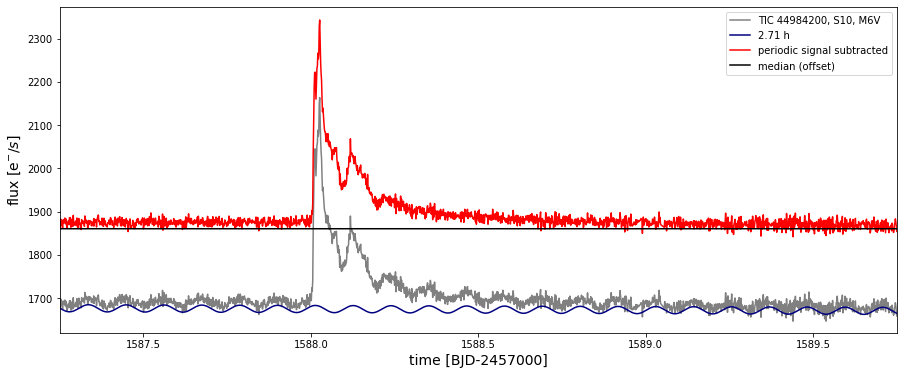

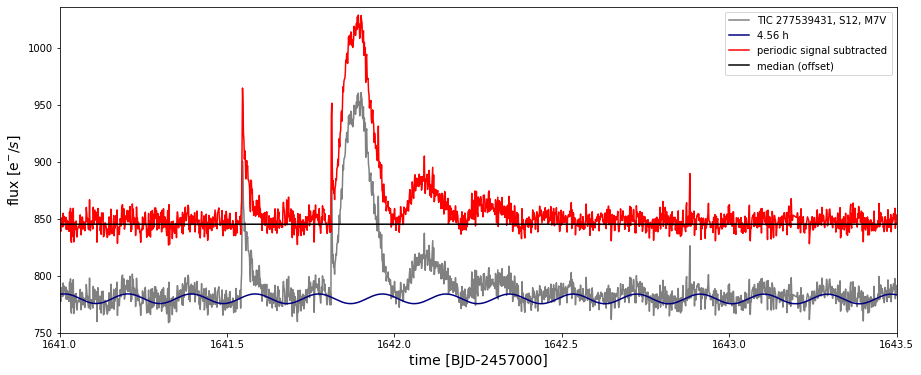

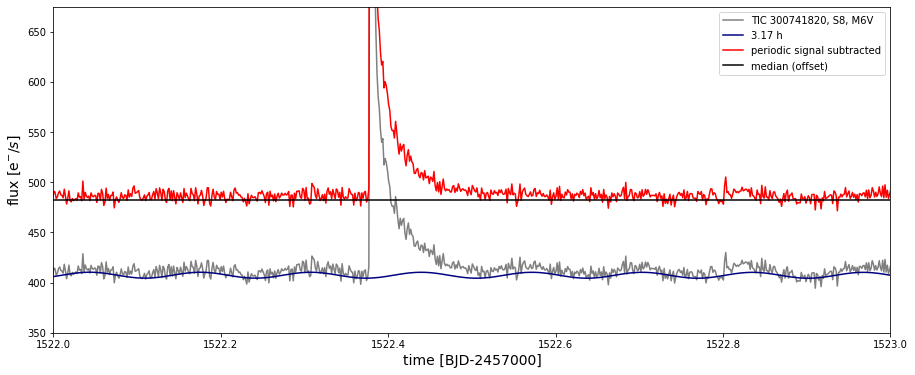

In [8]:
for i, row in lcs.iterrows():
    t, s_flux, model, period = remove_sinusoidal(row, save=True)

In [8]:
1/7.5*24

3.2